In [1]:
# import required packages
# tensorflow
import tensorflow as tf

# utility
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
data = pd.read_csv('../data/moore.csv', header=None).to_numpy()
data.shape

(162, 2)

In [3]:
# N X D matrix, D=1
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

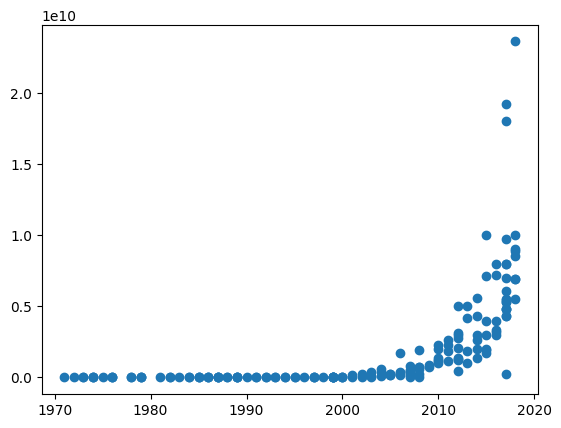

In [4]:
# plot the data
plt.scatter(X, y);

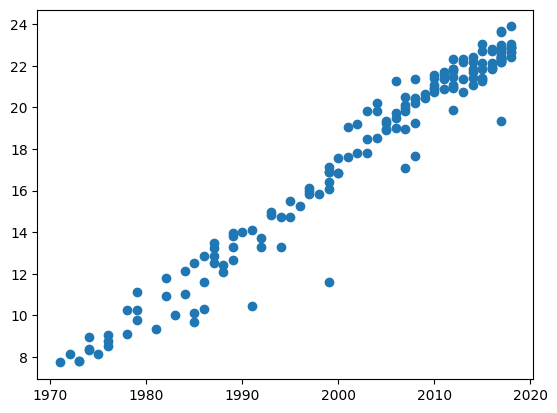

In [5]:
# use log to make the data linear
y = np.log(y)
plt.scatter(X, y);

In [6]:
X = X - X.mean()

In [7]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [8]:
# compile model
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [9]:
# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [10]:
# train model
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200

6/6 [==============================] - 0s 1ms/step - loss: 408.5436 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 498.2246 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 423.3503 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 381.2135 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 217.3319 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 150.8063 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 118.8706 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 82.6680 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 76.1809 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 999us/step - loss: 42.8871 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - los

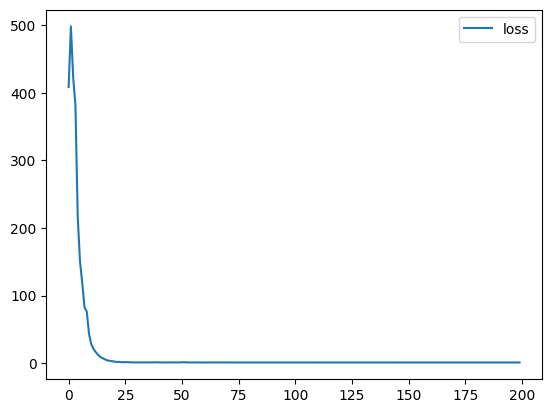

In [11]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [12]:
model.layers

In [13]:
model.layers[0].get_weights()

[array([[0.34518656]], dtype=float32), array([17.761948], dtype=float32)]

In [14]:
a = model.layers[0].get_weights()[0][0, 0]
a

0.34518656

In [15]:
np.exp(a)

1.4122534

In [16]:
f'Time to double: {np.log(2)/a}'

'Time to double: 2.0080364016983157'

## Part 2: Making Predictions

6/6 [==============================] - 0s 1ms/step


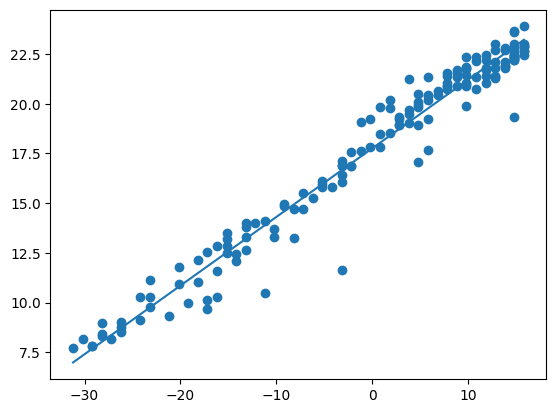

In [17]:
# make sure line fits our data
y_hat = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, y_hat);

In [18]:
# manual calculation

# get the weights
w, b = model.layers[0].get_weights()

# reshape X because we flattened it earlier
X = X.reshape(-1, 1)

# (N x 1) * (1 x 1) => (N x 1)
y_hat2 = (X.dot(w) + b).flatten()

# don't use == for floating points
np.allclose(y_hat, y_hat2)

True

## Part 3: Saving and Loading a model

In [19]:
# save the model to a file
model.save('model_regression.keras')

6/6 [==============================] - 0s 812us/step


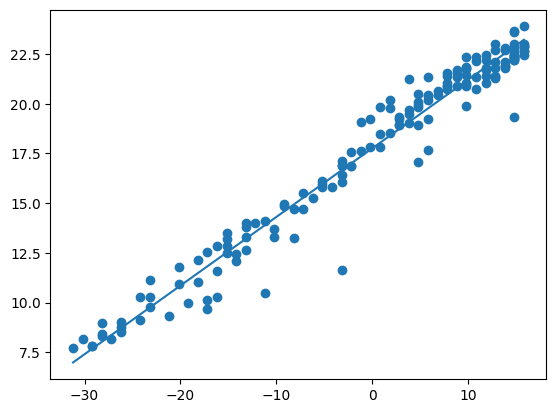

In [20]:
# load the model and confirm that it still works
model = tf.keras.models.load_model('model_regression.keras')
print(model.layers)

# make sure line fits our data
y_hat = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, y_hat);